# Wstęp do uczenia maszynowego - projekt 
## Michalina Matuszak UTP Bydgoszcz

# Diabetes Data Set
####  Informacje niezbędne do zrozumienia projektu:

Zbiór danych o diabetykach zawierający spis wyników badań krwi oraz wywiadu medycznego od pacjentów bez oraz z zarejestrowaną cukrzycą. Obszarem badań jest cukrzyca typu 2, nazywana także cukrzycą insulinoniezależną. Cukrzyca typu 2 należy do grupy chorób metabolicznych i charakteryzuje się występowaniem wysokiego poziomy glukozy we krwi oraz opornością na insulinę i względnym jej niedoborem. Za dwie podstawowe przyczyny cukrzycy typu 2 uważa się wspomnianą już insulinooporność oraz upośledzenie wydzielania insuliny. Chorobę dagnozuje się wykonując regularne pomiary poziomu glukozy we krwi, ponieważ wartość ta bezpośdrednio wynika z udziału insuliny. Czynnikami pomocnymi przy diagnozie są BMI, wiek, dieta, tryb życia, ciśnienie tętnicze i inne.
W zbiorze danych cechy odpowiadają czynnikom badanym podczas diagnozy choroby. 


#### Celem projektu jest: 
1. Analiza znaczenia danej cechy przy diagnozie choroby oraz analiza wzajemnych korelacji.
2. Stworzenie modelu klasyfikującego badaną osobę na podstawie dostępnych czynników (0 - niesklasyfikowano choroby, 1- cukrzyca).
3. Ocena jakości poszczególnych modeli w zależności od użytego algorytmu.

#### Informacje o cechach zbioru:
0. Pregnancies - liczba przebytych ciąż
1. Glucose - poziom glukozy we krwi
2. BloodPressure - ciśnienie tętnicze krwi
3. SkinThickness - grubość skóry
4. Insulin - poziom insuliny we krwi
5. BMI - wskaźnik masy ciała
6. DiabetesPedigreeFunction - funkcja określająca występowanie określonego genu u danej osoby
7. Age - wiek
8. Outcome - wynik (0 - brak cukrzycy, 1 - cukrzyca)

In [443]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [444]:
df = pd.read_csv('C:/Users/MSI-PC/WDUM/diabetes/diabetes.csv')

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Eksplorazyjna analiza danych

**Po wyświetlenie 5 pierwszych wierszy ze zbioru widać, że występują w nim brakujące wartości** 

In [446]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Wymiar zbioru danych: (liczba wierszy, liczba cech)**

In [447]:
df.shape

(768, 9)

**Liczba poszczególnych wyników: (jak widać mamy więcej informacji o osobach bez cukrzycy)**

In [448]:
# 0- brak cukrzycy
# 1- cukrzyca
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Ponieważ prawie połowa danych zawiera *missing values*, najrozsądniejszą opcją jest zastąpienie wartosci zerowych na medianę z danej kolumny:**

In [449]:
#Wstawianie NaN zamiast zerowych wartosci:
df.Insulin.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.BMI.replace(0, np.nan, inplace=True)

In [450]:
#Zaokrąglenie float do int, aby zachować spójność typów zmiennych
df = df.fillna(df.median()).round(0).astype(int) 
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,34,1,50,1
1,1,85,66,29,125,27,0,31,0
2,8,183,64,29,125,23,1,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


**Wybrane statystyki zbioru:**

In [451]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.108073,140.671875,32.447917,0.373698,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.791221,86.383060,6.868092,0.510322,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,18.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,28.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,37.000000,1.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


**Korelacja między cechami:**

In [452]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081770,0.025047,0.024186,-0.023148,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.182037,0.409283,0.217741,0.112770,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.124770,0.059146,0.184299,0.007224,0.239528,0.065068
SkinThickness,0.081770,0.182037,0.124770,1.000000,0.155610,0.544493,0.082819,0.126107,0.214873
Insulin,0.025047,0.409283,0.059146,0.155610,1.000000,0.180013,0.128747,0.097101,0.203790
BMI,0.024186,0.217741,0.184299,0.544493,0.180013,1.000000,0.120317,0.027734,0.310830
DiabetesPedigreeFunction,-0.023148,0.112770,0.007224,0.082819,0.128747,0.120317,1.000000,0.041030,0.159888
Age,0.544341,0.263514,0.239528,0.126107,0.097101,0.027734,0.041030,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.214873,0.203790,0.310830,0.159888,0.238356,1.000000


### Wnioski:

1. Wynik jest pozytywnie powiązany z poziomem glukozy we krwi
2. Wiek i liczba ciąż ma pozytywną korelację
3. BMI i grubość skóry mają pozytywną korelację

**Aby lepiej zwizualizować wybrane wartości korelacji posłuży heatmap:**

<AxesSubplot:>

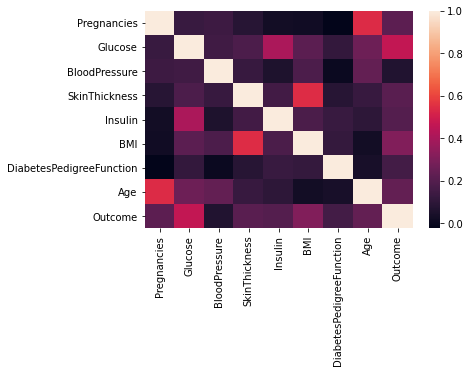

In [453]:
sns.heatmap(corr)

**Na poniższym wykresie widać współzależności danych cech z dodatkowym uwzględnieniem wartości wynikowej:**

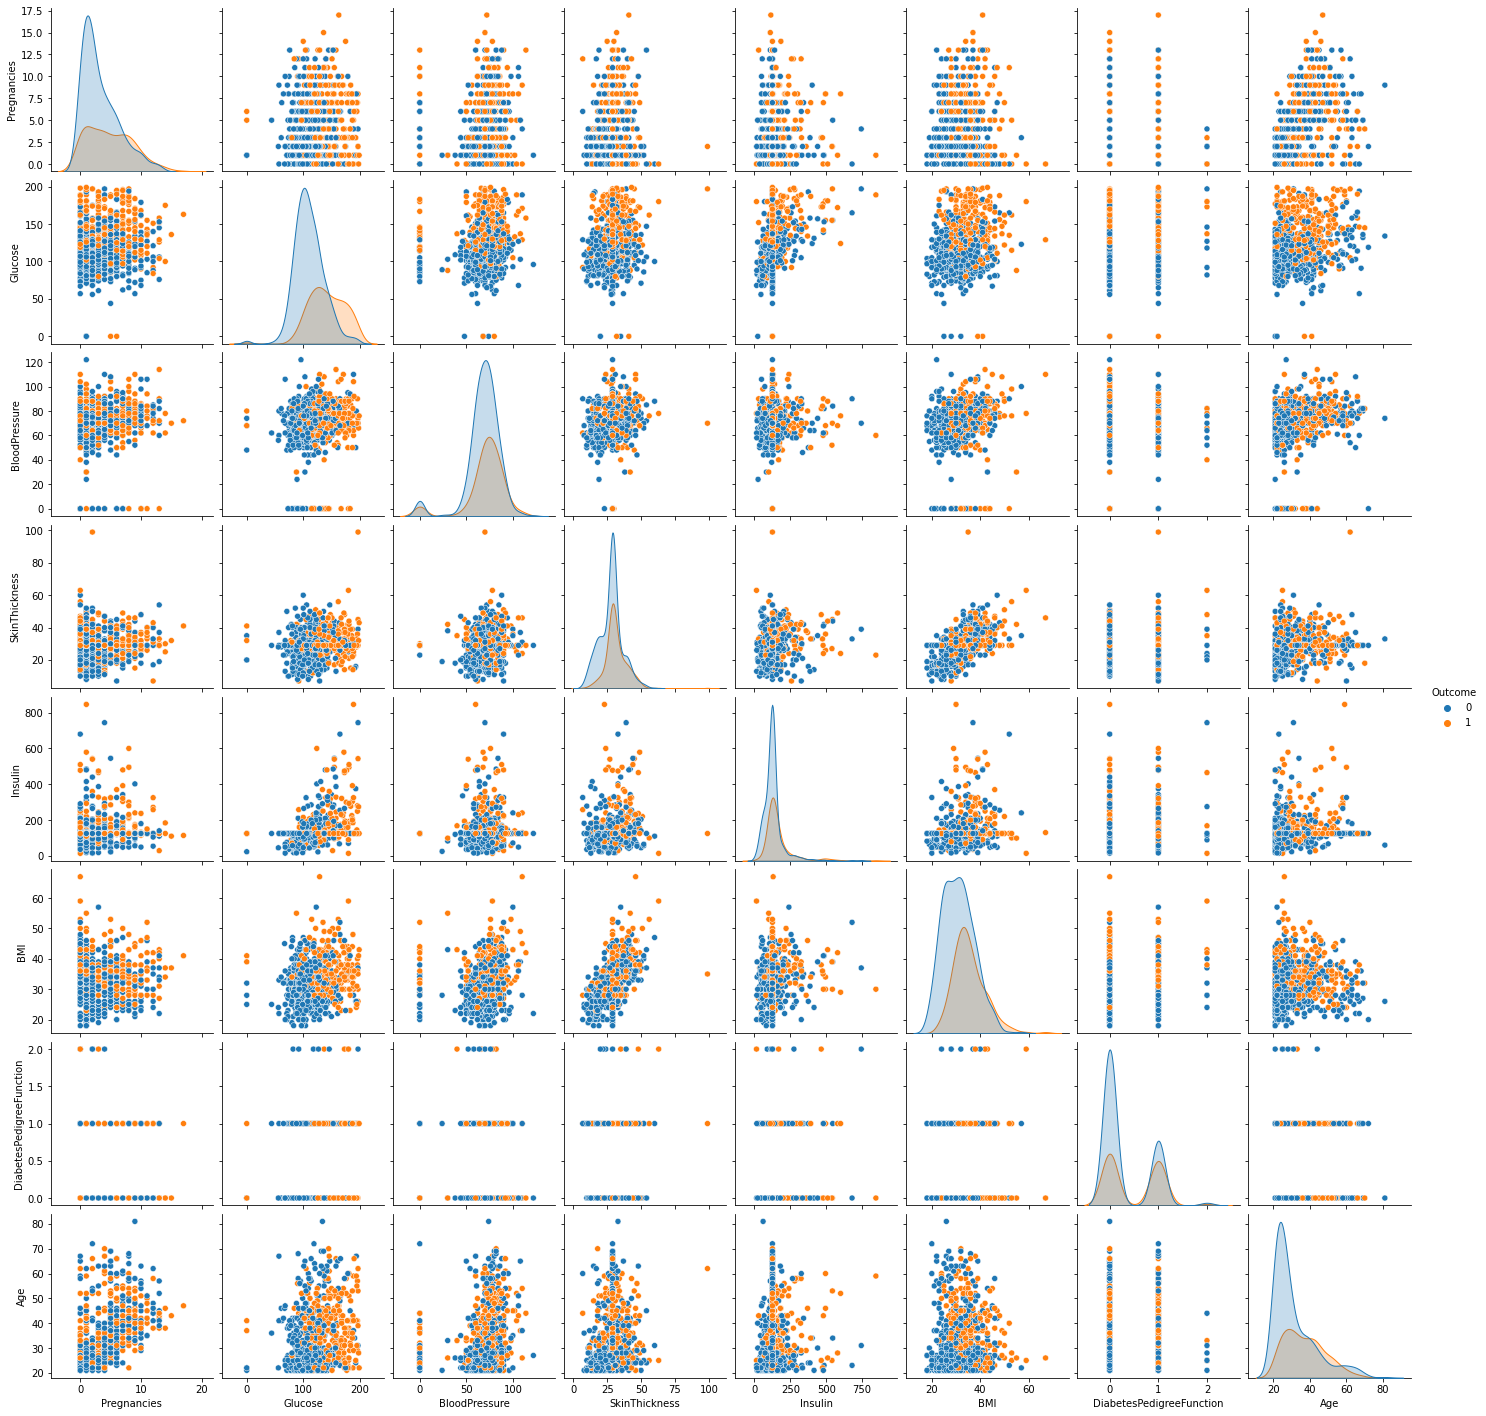

In [454]:
sns.pairplot(df, diag_kind='kde', hue="Outcome")

# Uczenie z nadzorem (ang. supervised learning) - klasyfikacja

https://scikit-learn.org/stable/supervised_learning.html

## Przygotowanie modelu:

**Podział danych na zbiór treningowy (70%) i testowy (30%):**

In [455]:
from sklearn.model_selection import train_test_split

In [456]:
#cechy jako zbiór X
X = df.drop('Outcome', axis=1)

#wynik jako Y
Y = df['Outcome']

In [457]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

## Algorytm Support Vector Machines SVM

https://scikit-learn.org/stable/modules/svm.html#svm

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [458]:
#import modułów
from sklearn import svm
from sklearn.svm import SVC

### Normalizacja danych:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

**Przekształcamy cechy skalując każdą kolumnę do określonego zakresu. Estymator skaluje i tłumaczy każdą cechę indywidualnie tak, aby znajdowała się w podanym zakresie na zbiorze uczącym, np. od zera do jednego.**

```X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))```

```X_scaled = X_std * (max - min) + min```

In [459]:
#MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Wyniki po normalizacji, ocena modelu:

In [460]:
#import modułów
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#### Wyznaczanie najbardziej optymalnego parametru C (Support Vector Classification):

In [461]:
svm_score_list=[]
n_list = range(1,10)

for n in n_list:
    clf = svm.SVC( C=n, kernel="rbf")
    clf.fit(X_train_scaled, Y_train)
    svm_score_list.append(clf.score(X_test_scaled, Y_test))
   
print("(C, score)")
n_list[np.argmax(svm_score_list)], svm_score_list[np.argmax(svm_score_list)]

(C, score)


(1, 0.7792207792207793)

#### Wykres zależności parametru *C* od *score*:

c:\users\msi-pc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

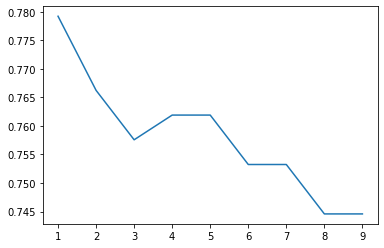

In [462]:
sns.lineplot(n_list, svm_score_list)

#### Accuracy:

In [463]:
# Ocena modelu, który przyjmuje znormalizowane wartości
clf = svm.SVC(C = 1, kernel='rbf') # C-Support Vector Classification
clf.fit(X_train_scaled,Y_train)
minmax_score = clf.score(X_test_scaled,Y_test) #accuracy
print("MinMax score: ")
print("acc: ", minmax_score) 

MinMax score: 
acc:  0.7792207792207793


#### Confusion matrix:

In [464]:
Y_pred_minmax = clf.predict(X_test_scaled)
print(metrics.confusion_matrix(Y_test,Y_pred_minmax)) #confusion matrix

[[133  13]
 [ 38  47]]


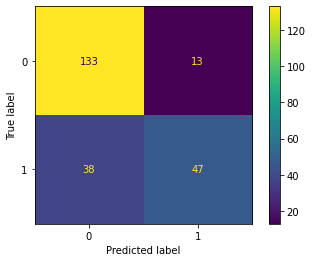

In [465]:
plot_confusion_matrix(clf, X_test_scaled, Y_test) #wykres do tabelki wyżej
plt.show()

#### Classification report:

In [466]:
print(classification_report(Y_test, Y_pred_minmax, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.78      0.55      0.65        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



## Wniosek:

**Ocena jakości modelu: średnia.**
**Model klasyfikujący chorobę u badanych powinien mieć większą czułość, niż precyzję (podawać więcej false positivów, niż false negativów), ponieważ diagnozując chorobę lepiej jest wykryć nieistniejącą chorobę (i taki wynik traktować jako klasyfikację do grupy podwyższonego ryzyka lub przedwczesną profilaktykę), niż nie wykryć niczego pomimo tego, że pacjent w rzeczywistości jest już chory.**

# Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [467]:
from sklearn.linear_model import LogisticRegression

### Standaryzacja danych:

**Standaryzujemy dane, usuwając średnią i skalując do wariancji jednostkowej.  Standardowy wynik próbki x oblicza się jako: 
```z = (x - u) / s ``` 
gdzie:
`u` jest średnią z próbek uczących, 
`s` jest odchyleniem standardowym próbek uczących**

In [468]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Accuracy:

In [469]:
lg = LogisticRegression(C=100, max_iter=1000)
lg.fit(X_train_scaled,Y_train)
acc_lg_sc= lg.score(X_test_scaled, Y_test)
print("acc: ", acc_lg_sc)

acc:  0.7748917748917749


#### Confusion matrix:

In [470]:
Y_pred4 = lg.predict(X_test_scaled)
print(metrics.confusion_matrix(Y_test,Y_pred4))

[[131  15]
 [ 37  48]]


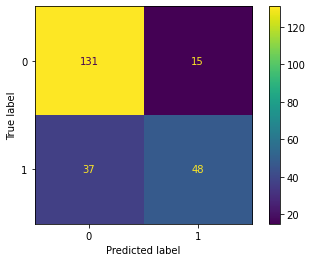

In [471]:
plot_confusion_matrix(lg, X_test_scaled, Y_test)
plt.show()

#### Classification report:

In [472]:
print(classification_report(Y_test, Y_pred4, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



#### Ocena znaczenia poszczególnych cech:

Feature: 0, Score: 0.32586
Feature: 1, Score: 1.05017
Feature: 2, Score: -0.29311
Feature: 3, Score: -0.06959
Feature: 4, Score: -0.05448
Feature: 5, Score: 0.74772
Feature: 6, Score: 0.22185
Feature: 7, Score: 0.25386


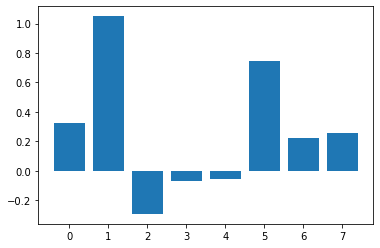

In [473]:
from matplotlib import pyplot
importance = lg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int32
 1   Glucose                   768 non-null    int32
 2   BloodPressure             768 non-null    int32
 3   SkinThickness             768 non-null    int32
 4   Insulin                   768 non-null    int32
 5   BMI                       768 non-null    int32
 6   DiabetesPedigreeFunction  768 non-null    int32
 7   Age                       768 non-null    int32
 8   Outcome                   768 non-null    int32
dtypes: int32(9)
memory usage: 27.1 KB


## Wniosek:

**Model używający regresji logistycznej jest w niewielkim stopniu bardziej trafny oraz posiada większą czułość niż model SVM.  Dodatkowo możemy przeanalizować znaczenie poszczególnych cech oraz ich wpływ na klasyfikację choroby. Jak widać na wykresie największy wpływ ma poziom glukozy (cecha 1) oraz BMI (cecha 5), najmniejsze znaczenie ma ciśnienie krwi (cecha 2).**

# Algorytm K-najbliższych sąsiadów

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [475]:
from sklearn.neighbors import KNeighborsClassifier

#### Wyzaczanie najbardziej optymalnej liczby *k*:

In [476]:
test_score_list = []
k_list = range(1, 100)

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    test_score_list.append(knn.score(X_test_scaled, Y_test))
    
print("(k, score)")
k_list[np.argmax(test_score_list)], test_score_list[np.argmax(test_score_list)]

(k, score)


(23, 0.7965367965367965)

#### Wykres zależności liczby *k* od *score*:

c:\users\msi-pc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

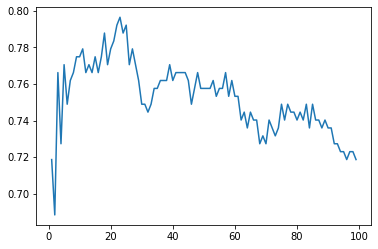

In [477]:
sns.lineplot(k_list, test_score_list)

#### Accuracy:

In [478]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled, Y_train)
acc_knn_sc = knn.score(X_test_scaled,Y_test)
print("acc: ", acc_knn_sc)

acc:  0.7965367965367965


#### Confusion matrix:

In [479]:
Y_pred5 = knn.predict(X_test_scaled)
print(metrics.confusion_matrix(Y_test,Y_pred5))

[[135  11]
 [ 36  49]]


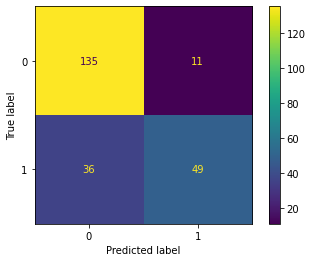

In [480]:
plot_confusion_matrix(knn, X_test_scaled, Y_test)
plt.show()

#### Classification report:

In [481]:
print(classification_report(Y_test, Y_pred5, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.82      0.58      0.68        85

    accuracy                           0.80       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.80      0.80      0.79       231



## Wniosek:

**Model wykorzystujacy algorytm K-najbliższych sąsiadów jest najbardziej trafny, jednakże również jak w przypadku modelu SVM posiada niską czułość.**